# Segmentation using Otsu

Explanation to do

Definitions:
- `input` we talk about the raw image that must be segmented.
- `output` we talk about the mask image that is the segmentation of the `input`

## Imports

In [1]:
from src.base_segmentation import Otsu
from src.utils import load_params, load_tiff, save_tiff
from pathlib import Path
from napari import Viewer

2022-06-26 03:35:36.639230: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-26 03:35:36.641993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-26 03:35:36.642001: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load Parameters for the segmentation
You need to tune parameters to adapt the segmentor to your image.
Please check the `param_path` where every necessary parameters are stored for YOU to change.

In [2]:
# load params

param_path = Path('../parameters/default_otsu.yml')
params = load_params(param_path)

## Load Image
For the demo, only the 10 first image are taken

In [3]:
# load image

im_path = Path(params["input"]["path"])
im_axes = params["input"]["axes"]
im = load_tiff(im_path, im_axes)[:10] # take only a slice of the image for demo

## Run the Segmentation

In [4]:
segmentator_params = params["otsu"]
segmentator = Otsu(im, params=segmentator_params)
mask = segmentator.get_segmentation()

## Save the Segmentation result

In [5]:
output_path = Path(params["output"]["path"])
output_axes = params["output"]["axes"]
save_tiff(output_path, mask, output_axes)

PosixPath('../data/results/placozoan-movie_masked.tif')

The mask is saved at `output_path`. You can open it with your favorite image viewer (Napari, ImageJ, Imaris, ...)
The following section propose you pythonic way to visualize the input and output images

# Matplotlib Viewer

In [6]:
import matplotlib.pyplot as plt

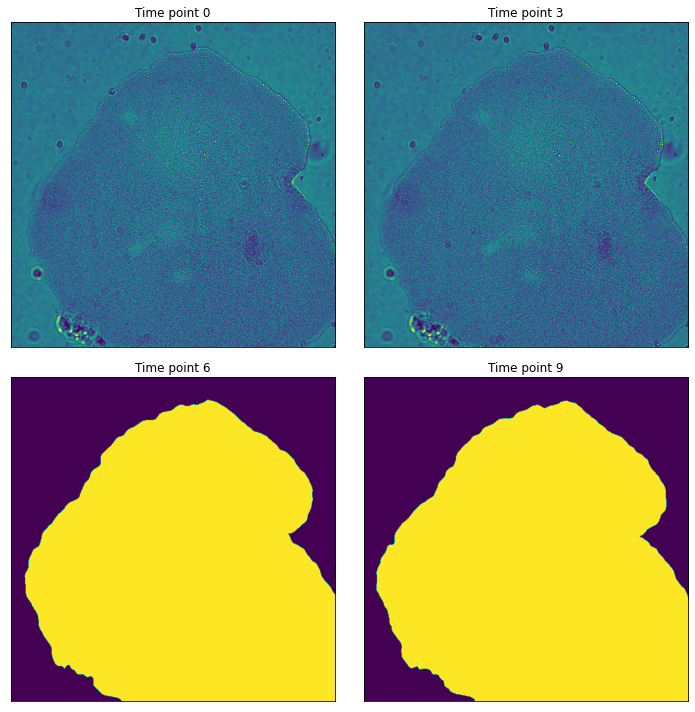

In [7]:
nb_time_points = len(im)

fig, axes = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'aspect':1}, sharex=True, sharey=True)
axes = axes.flatten()
for i, ax in enumerate(axes):
    tp = i*(nb_time_points-1)//(len(axes)-1)
    if i // 2 == 0:
        ax.imshow(im[tp, ...], vmin=10, vmax=100)
    else:
        ax.imshow(mask[tp, ...])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Time point {tp}')
fig.tight_layout()

# Napari Viewer

In [8]:
viewer = Viewer()

/home/clement/Documents/centuri-hackaton/venv/lib/python3.8/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [9]:
im_layer = viewer.add_image(im)
mask_layer = viewer.add_labels(mask)

In [10]:
# if you want to save the manually corrected mask run this cell
mask_corrected = mask_layer.data
output_path = Path(params["output"]["path"])
output_axes = params["output"]["axes"]
save_tiff(output_path, mask, output_axes)

PosixPath('../data/results/placozoan-movie_masked.tif')